In [1]:
import scanpy as sc
import schist as scs
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
sc.set_figure_params(dpi_save=300)

In [4]:
import graph_tool.all as gt

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +
/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_

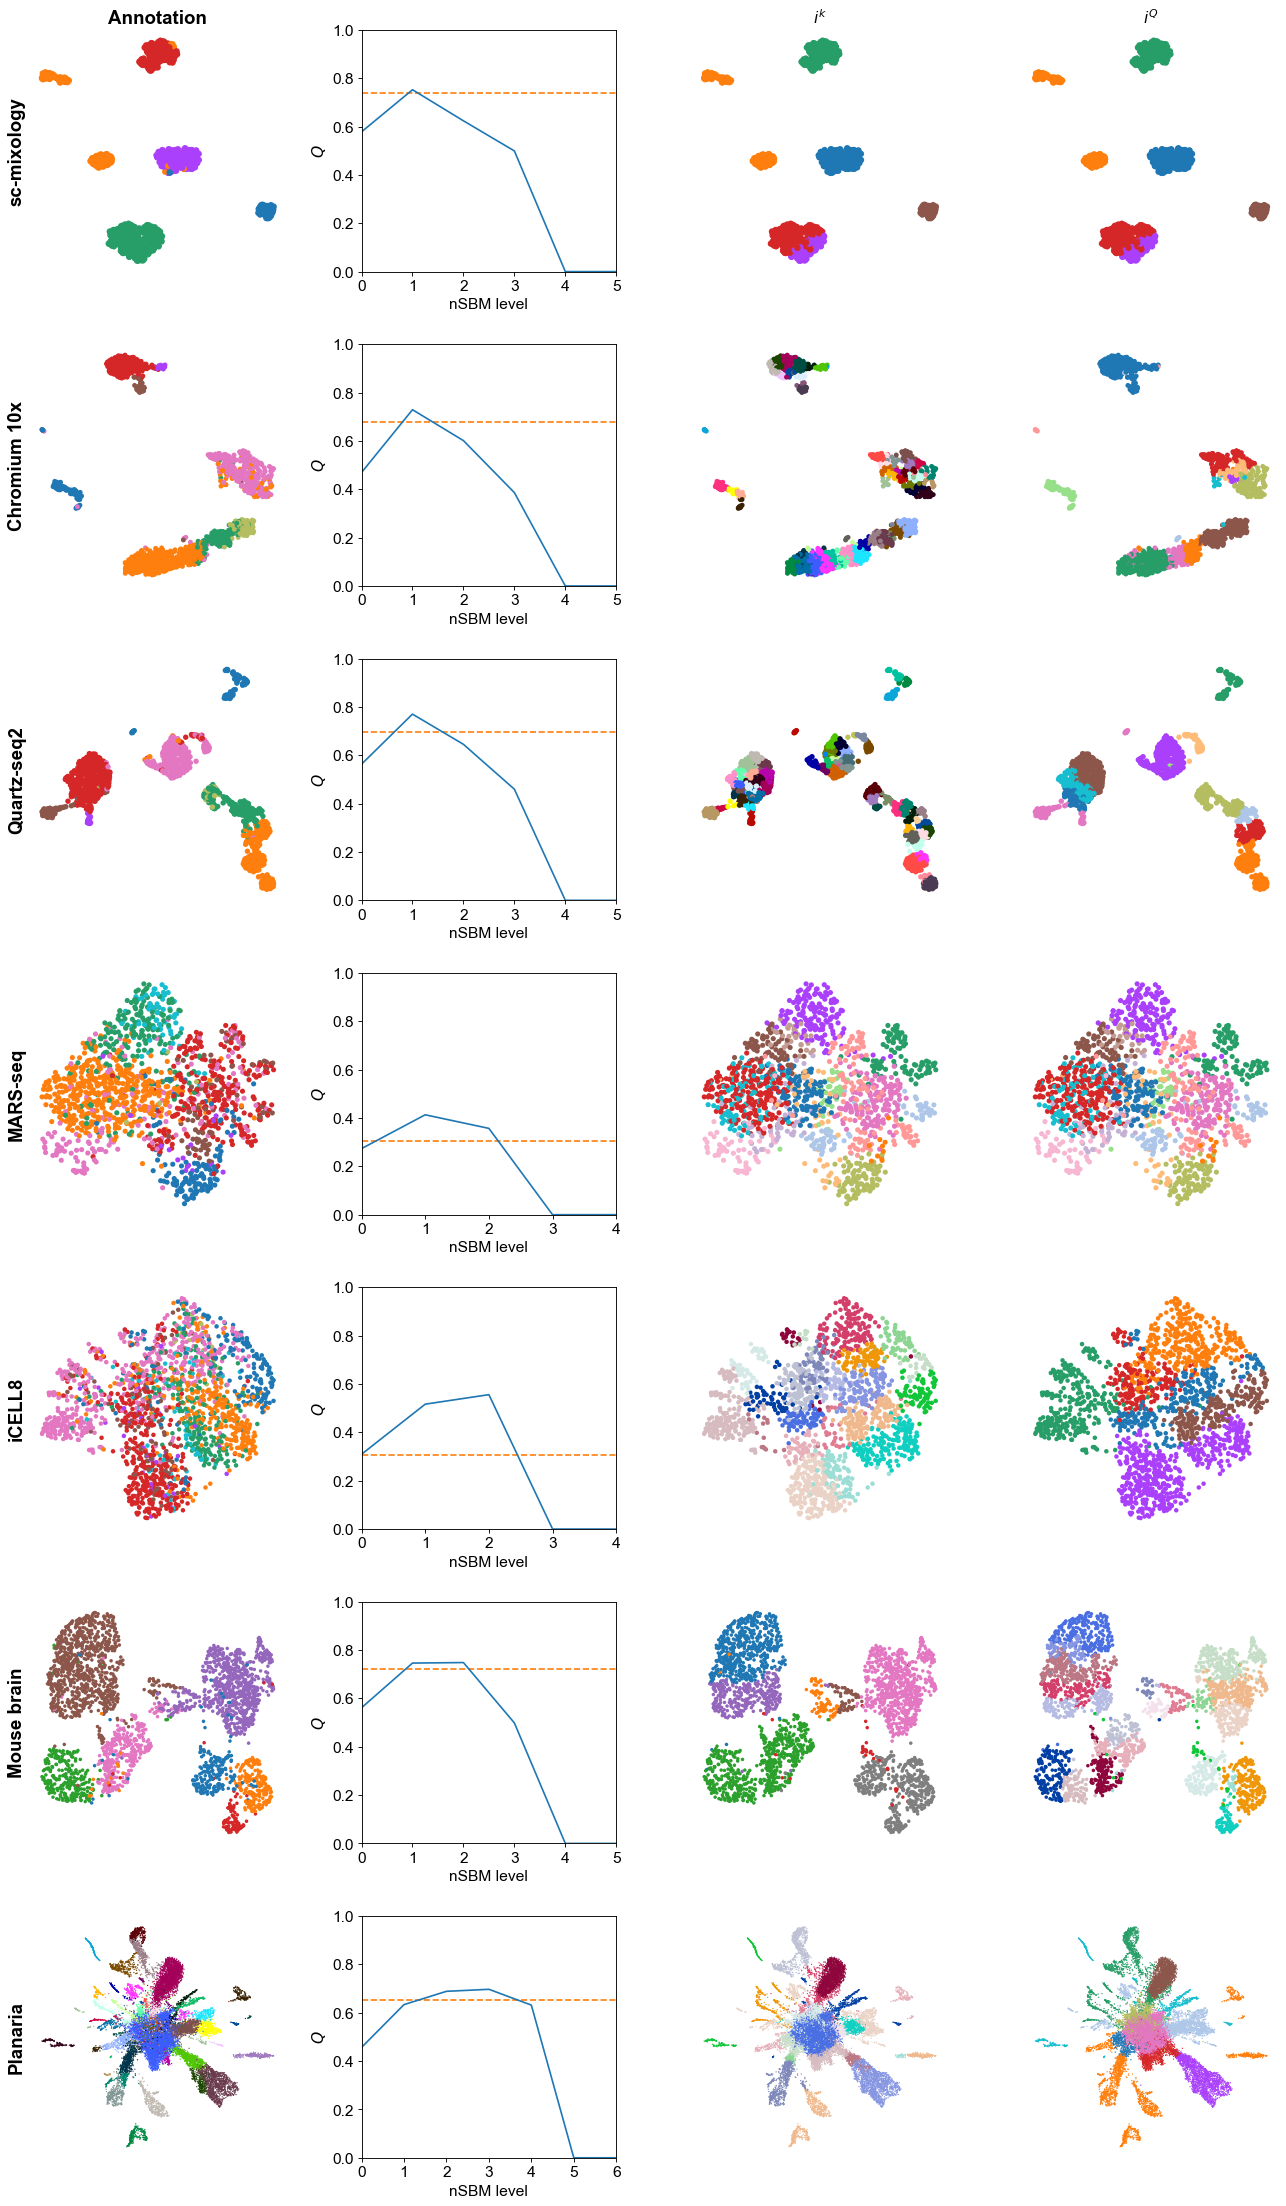

In [26]:
fig = plt.figure(constrained_layout=False, figsize=(20, 35))
gs = fig.add_gridspec(nrows=7, ncols=4, wspace=0.3, hspace=0.3)

adata = scs.io.read("Tian/Tian_pc50_n15_dcTrue")

name = 'sc-mixology'
ann = 'cell_line'
lk = 1
lq = 1
k = 21

level = lk
ax00 = fig.add_subplot(gs[0, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', show=False, ax=ax00,
           frameon=True, legend_loc='none')
ax00.set_ylabel(name, fontsize='large', fontweight='bold')
ax00.set_title('Annotation', fontsize='large', fontweight='bold')
ax00.set_xlabel("")
ax00.set_frame_on(False)

level = lk
ax02 = fig.add_subplot(gs[0, 2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title=r'$i^k$', show=False, ax=ax02,
           frameon=False, legend_loc='none')

ax03 = fig.add_subplot(gs[0, 3])
level = lq
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title=r'$i^Q$', show=False, ax=ax03,
           frameon=False, legend_loc='none')

g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax01 = fig.add_subplot(gs[0, 1])
ax01.plot(adata.uns['schist']['stats']['modularity'])
ax01.set_xticks(range(eff_level + 1))
ax01.set_xlim(0, eff_level)
ax01.set_ylabel('$Q$')
ax01.set_xlabel("nSBM level")
ax01.grid(False)
ax01.set_ylim(0, 1)
ax01.hlines(M, 0, eff_level, color='C1', linestyle='--')


adata = scs.io.read("10XV3_075")

name = '10X'
ann = 'nnet2'
lk = 0
lq = 1
k = 43

ax10 = fig.add_subplot(gs[1, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax10, show=False,
           frameon=True, legend_loc='none')
ax10.set_ylabel("Chromium 10x", fontsize='large', fontweight='bold')
ax10.set_xlabel("")
ax10.set_frame_on(False)

level = lk
ax12 = fig.add_subplot(gs[1,2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax12, show=False,
           frameon=False, legend_loc='none')

level = lq
ax13 = fig.add_subplot(gs[1,3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax13, show=False,
           frameon=False, legend_loc='none')

g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax11 = fig.add_subplot(gs[1, 1])
ax11.plot(adata.uns['schist']['stats']['modularity'])
ax11.set_xticks(range(eff_level + 1))
ax11.set_xlim(0, eff_level)
ax11.set_ylabel('$Q$')
ax11.set_xlabel("nSBM level")
ax11.grid(False)
ax11.set_ylim(0, 1)
ax11.hlines(M, 0, eff_level, color='C1', linestyle='--')



adata = scs.io.read("Quartzseq_075")

name = 'Quartzseq'
ann = 'nnet2'
lk = 0
lq = 1
k = 37

ax20 = fig.add_subplot(gs[2, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax20, show=False,
           frameon=True, legend_loc='none')
ax20.set_ylabel("Quartz-seq2", fontsize='large', fontweight='bold')
ax20.set_xlabel("")
ax20.set_frame_on(False)


level = lk
ax22 = fig.add_subplot(gs[2,2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax22, show=False,
           frameon=False, legend_loc='none')

level = lq
ax23 = fig.add_subplot(gs[2,3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax23, show=False,
           frameon=False, legend_loc='none')

g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax21 = fig.add_subplot(gs[2, 1])
ax21.plot(adata.uns['schist']['stats']['modularity'])
ax21.set_xticks(range(eff_level + 1))
ax21.set_xlim(0, eff_level)
ax21.set_ylabel('$Q$')
ax21.set_xlabel("nSBM level")
ax21.grid(False)
ax21.set_ylim(0, 1)
ax21.hlines(M, 0, eff_level, color='C1', linestyle='--')



adata = scs.io.read("MARSseq_075")

name = 'MARSseq'
ann='nnet2'
lk = 1
lq = 1
k = 9

ax30 = fig.add_subplot(gs[3, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax30, show=False,
           frameon=True, legend_loc='none')
ax30.set_ylabel("MARS-seq", fontsize='large', fontweight='bold')
ax30.set_xlabel("")
ax30.set_frame_on(False)

level = lk
ax32 = fig.add_subplot(gs[3,2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax32, show=False,
           frameon=False, legend_loc='none')

level = lq
ax33 = fig.add_subplot(gs[3, 3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax33, show=False,
           frameon=False, legend_loc='none')


g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax31 = fig.add_subplot(gs[3, 1])
ax31.plot(adata.uns['schist']['stats']['modularity'])
ax31.set_xticks(range(eff_level + 1))
ax31.set_xlim(0, eff_level)
ax31.set_ylabel('$Q$')
ax31.set_xlabel("nSBM level")
ax31.grid(False)
ax31.set_ylim(0, 1)
ax31.hlines(M, 0, eff_level, color='C1', linestyle='--')



adata = scs.io.read("iCELL8_075")

name = 'iCELL8'
ann = 'nnet2'
lk = 1
lq = 2
k = 20

ax40 = fig.add_subplot(gs[4, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax40, show=False,
           frameon=True, legend_loc='none')
ax40.set_ylabel("iCELL8", fontsize='large', fontweight='bold')
ax40.set_xlabel("")
ax40.set_frame_on(False)

level = lk
ax42 = fig.add_subplot(gs[4, 2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax42, show=False,
           frameon=False, legend_loc='none')

level = lq
ax43 = fig.add_subplot(gs[4, 3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax43, show=False,
           frameon=False, legend_loc='none')

g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax41 = fig.add_subplot(gs[4, 1])
ax41.plot(adata.uns['schist']['stats']['modularity'])
ax41.set_xticks(range(eff_level + 1))
ax41.set_xlim(0, eff_level)
ax41.set_ylabel('$Q$')
ax41.set_xlabel("nSBM level")
ax41.grid(False)
ax41.set_ylim(0, 1)
ax41.hlines(M, 0, eff_level, color='C1', linestyle='--')



adata = scs.io.read("../Zeisel")

name = 'MouseBrain'
ann='level1class'
lk = 2
lq = 1
k = 37

ax50 = fig.add_subplot(gs[5, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax50, show=False,
           frameon=True, legend_loc='none')
ax50.set_ylabel("Mouse brain", fontsize='large', fontweight='bold')
ax50.set_xlabel("")
ax50.set_frame_on(False)

level = lk
ax52 = fig.add_subplot(gs[5, 2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax52, show=False,
           frameon=False, legend_loc='none')

level = lq
ax53 = fig.add_subplot(gs[5,3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax53, show=False,
           frameon=False, legend_loc='none')


g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax51 = fig.add_subplot(gs[5, 1])
ax51.plot(adata.uns['schist']['stats']['modularity'])
ax51.set_xticks(range(eff_level + 1))
ax51.set_xlim(0, eff_level)
ax51.set_ylabel('$Q$')
ax51.set_xlabel("nSBM level")
ax51.grid(False)
ax51.set_ylim(0, 1)
ax51.hlines(M, 0, eff_level, color='C1', linestyle='--')


adata = scs.io.read("Planaria_scs")

name = 'Planaria'
ann='final_Id'
lk = 2
lq = 3
k = 37

ax60 = fig.add_subplot(gs[6, 0])
sc.pl.umap(adata, color=f'{ann}', 
           title='', ax=ax60, show=False,
           frameon=True, legend_loc='none')
ax60.set_ylabel("Planaria", fontsize='large', fontweight='bold')
ax60.set_xlabel("")
ax60.set_frame_on(False)



level = lk
ax62 = fig.add_subplot(gs[6, 2])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax62, show=False, 
           frameon=False, legend_loc='none')

level = lq
ax63 = fig.add_subplot(gs[6, 3])
sc.pl.umap(adata, color=f'nsbm_level_{level}', 
           title='', ax=ax63, show=False,
           frameon=False, legend_loc='none')


g = adata.uns['schist']['state'].g
B = gt.BlockState(g, b=adata.obs[ann].cat.codes.values)
M = gt.modularity(g, B.get_blocks())

levels = adata.obs.filter(like='nsbm_level').columns
eff_level = np.sum([adata.obsm[f'CM_{l}'].shape[1]  > 1 for l in levels]) + 1

ax61 = fig.add_subplot(gs[6, 1])
ax61.plot(adata.uns['schist']['stats']['modularity'])
ax61.set_xticks(range(eff_level + 1))
ax61.set_xlim(0, eff_level)
ax61.set_ylabel('$Q$')
ax61.set_xlabel("nSBM level")
ax61.grid(False)
ax61.set_ylim(0, 1)
ax61.hlines(M, 0, eff_level, color='C1', linestyle='--')

plt.tight_layout()
plt.show()
fig.savefig("FigureOptimalLevel.pdf", dpi=300, transparent=True)